In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider
import scipy

# GX 01
You are given the complex field `01_unknown.npy`. Load the complex array with `np.load("01_unknown.npy")`.
The wavelength is 633nm and the physical pixel size of the image is 1µm.


## Tasks
### 1
What is the correct negative propagation (backwards) distance to obtain a sharp, meaningful image?


### 2 Bonus
What happens if you scale the pixel size and the propagation distance by a factor of 10. Does it still work? Try it out and explain what happens.
What would you need to change to make it work again.

In [36]:
wvl = 633e-9 
dx = 1e-6

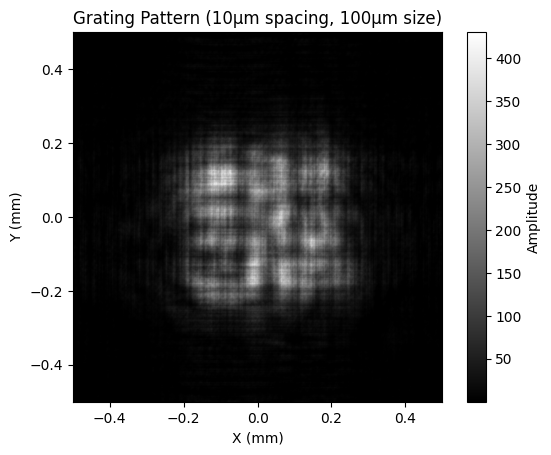

In [37]:
U1 = np.load("01_unknown.npy")
plt.imshow(np.abs(U1)**2, cmap="gray", extent=[-0.5, 0.5, -0.5, 0.5])
plt.colorbar(label="Amplitude")
plt.title("Grating Pattern (10µm spacing, 100µm size)")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.show()

In [38]:

def angular_spectrum_propagation(U0, wvl, d, dx):
    """
    Propagates an optical field using the Angular Spectrum Method.

    Parameters:
        U0  : 2D numpy array (input wavefield)
        wvl : float (wavelength of light in meters)
        d   : float (propagation distance in meters)
        dx  : float (sampling interval in meters)

    Returns:
        U   : 2D numpy array (propagated wavefield)
    """

    # Get array size
    ny, nx = U0.shape
    k = 2 * np.pi / wvl  # Wave number

    # Create spatial frequency coordinates
    fx = np.fft.fftfreq(nx, dx)
    fy = np.fft.fftfreq(ny, dx)
    FX, FY = np.meshgrid(fx, fy)

    # Compute transfer function
    H = np.exp(1j * k * d * np.sqrt(1 - (wvl * FX) ** 2 - (wvl * FY) ** 2))
    H[np.isnan(H)] = 0  # Remove undefined values

    # Compute angular spectrum
    U0_spectrum = np.fft.fft2(U0)
    U_spectrum = U0_spectrum * H

    # Inverse FFT to obtain propagated field
    U = np.fft.ifft2(U_spectrum)

    return U

In [39]:
def propagate_and_plot(z):

    
    U0 = np.load("01_unknown.npy")
    wvl = 633e-9
    u_prop = angular_spectrum_propagation(U0, wvl, z, dx)
    # Display the grating
    plt.figure(figsize=(6, 6))
    plt.imshow(np.abs(u_prop)**2, cmap="gray", extent=[-0.5, 0.5, -0.5, 0.5])
    plt.colorbar(label="Amplitude")
    plt.title("Grating Pattern propagated 1mm")
    plt.xlabel("X (mm)")
    plt.ylabel("Y (mm)")
    plt.show()

In [40]:
# this provides an interactive slider to play around
interact(propagate_and_plot, z=FloatSlider(min=-501, max=-499, step=10e-6, readout_format='.6f'),\
        wvl=FloatSlider(min=400e-9, max=800e-9, step=10e-9, readout_format='.10f'),\
        grating_period=FloatSlider(value=10e-6, min=5e-6, max=50e-6, step=2e-6, readout_format='.10f'));

interactive(children=(FloatSlider(value=-499.0, description='z', max=-499.0, min=-501.0, readout_format='.6f',…

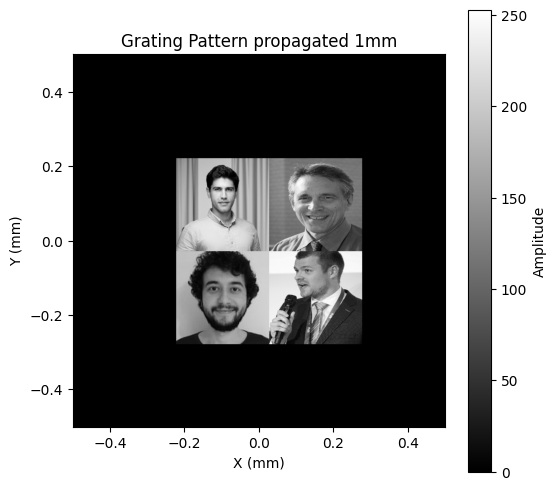

In [41]:
propagate_and_plot(-30e-3)